In [1]:
# Can we build a simple GAN that can produce all 10 mnist digits?

In [2]:
%pylab inline
import os
import time
import random
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = [x/255.0 for x in [x_train, x_test]]
y_train, y_test = [tf.keras.utils.to_categorical(x) for x in [y_train, y_test]]

Populating the interactive namespace from numpy and matplotlib


In [3]:
opt = Adam()
ZDIM = 100

# discriminator
# 0 if it's fake, 1 if it's real
x = in1 = Input((28,28))
x = Reshape((28,28,1))(x)

x = Conv2D(64, (5,5), padding='same', strides=(2,2))(x)
x = BatchNormalization()(x)
x = ELU()(x)

x = Conv2D(128, (5,5), padding='same', strides=(2,2))(x)
x = BatchNormalization()(x)
x = ELU()(x)

x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = ELU()(x)
x = Dense(1, activation='sigmoid')(x)
dm = Model(in1, x)
dm.compile(opt, 'binary_crossentropy')
dm.summary()

# generator, output digits
x = in1 = Input((ZDIM,))

x = Dense(7*7*64)(x)
x = BatchNormalization()(x)
x = ELU()(x)
x = Reshape((7,7,64))(x)

x = Conv2DTranspose(128, (5,5), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = ELU()(x)

x = Conv2DTranspose(1, (5,5), strides=(2,2), padding='same')(x)
x = Activation('sigmoid')(x)
x = Reshape((28,28))(x)

gm = Model(in1, x)
gm.compile('adam', 'mse')
gm.summary()

# GAN
dm.trainable = False
x = dm(gm.output)
tm = Model(gm.input, x)
tm.compile(opt, 'binary_crossentropy')

dlosses, glosses = [], []

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
batch_normalization_v2 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
elu (ELU)                    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 7, 7, 128)         512   

   0: dloss:  0.9590   gloss:  1.1669
  50: dloss:  0.5766   gloss:  0.7844
 100: dloss:  0.5541   gloss:  0.9275
 150: dloss:  0.4549   gloss:  1.1234
 200: dloss:  0.4169   gloss:  1.1805


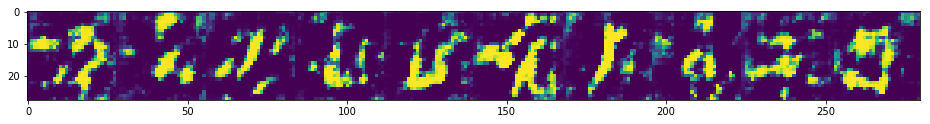

 250: dloss:  0.4681   gloss:  0.9428
 300: dloss:  0.5313   gloss:  1.0412
 350: dloss:  0.5468   gloss:  1.0439
 400: dloss:  0.5723   gloss:  0.9399
 450: dloss:  0.6219   gloss:  1.0215


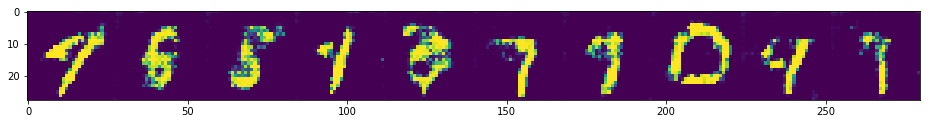

 500: dloss:  0.5902   gloss:  0.9254
 550: dloss:  0.5941   gloss:  0.9555
 600: dloss:  0.5786   gloss:  0.9720
 650: dloss:  0.5405   gloss:  1.0076
 700: dloss:  0.5577   gloss:  1.0234


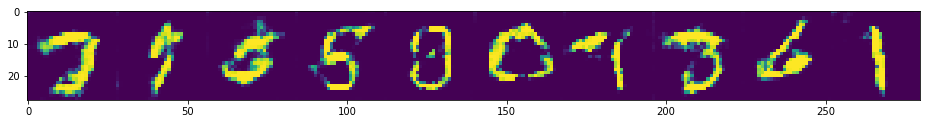

 750: dloss:  0.5478   gloss:  1.0744
 800: dloss:  0.5088   gloss:  1.1105
 850: dloss:  0.5002   gloss:  1.0790
 900: dloss:  0.4825   gloss:  1.1453
 950: dloss:  0.4924   gloss:  1.1605


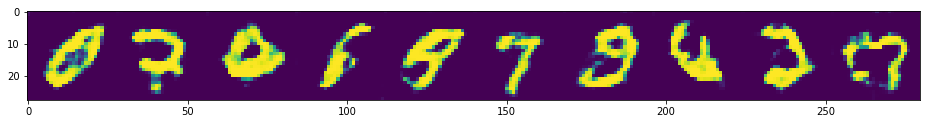

1000: dloss:  0.4788   gloss:  1.1728
1050: dloss:  0.4492   gloss:  1.2023
1100: dloss:  0.4218   gloss:  1.2861
1150: dloss:  0.4908   gloss:  1.1557
1200: dloss:  0.4732   gloss:  1.2152


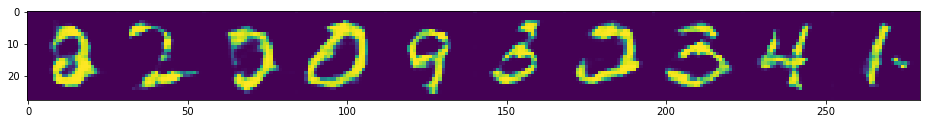

1250: dloss:  0.4730   gloss:  1.2143
1300: dloss:  0.4270   gloss:  1.1934
1350: dloss:  0.4378   gloss:  1.2557
1400: dloss:  0.4825   gloss:  1.2315
1450: dloss:  0.4303   gloss:  1.3091


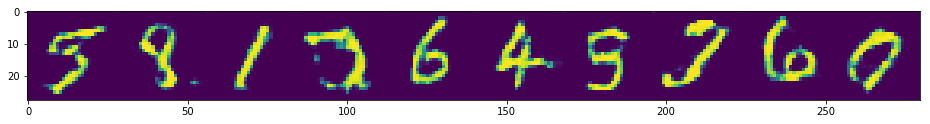

1500: dloss:  0.4559   gloss:  1.4055
1550: dloss:  0.4049   gloss:  1.3287
1600: dloss:  0.4486   gloss:  1.3931
1650: dloss:  0.4074   gloss:  1.3053
1700: dloss:  0.4427   gloss:  1.3471


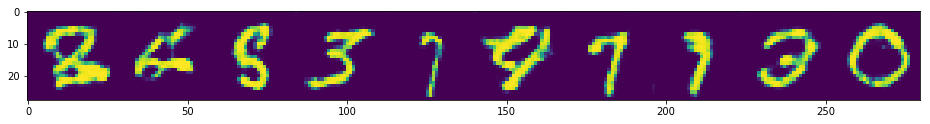

1750: dloss:  0.4185   gloss:  1.3881
1800: dloss:  0.4191   gloss:  1.3654
1850: dloss:  0.4268   gloss:  1.3829
1900: dloss:  0.4230   gloss:  1.4484
1950: dloss:  0.4205   gloss:  1.5051


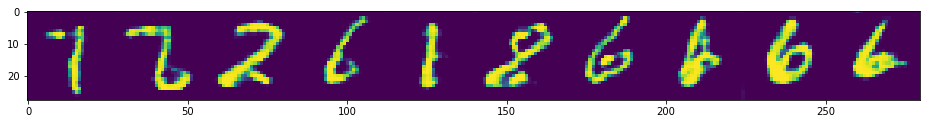

2000: dloss:  0.3721   gloss:  1.5224
2050: dloss:  0.4104   gloss:  1.6754
2100: dloss:  0.4043   gloss:  1.4849
2150: dloss:  0.3668   gloss:  1.4624
2200: dloss:  0.3541   gloss:  1.5945


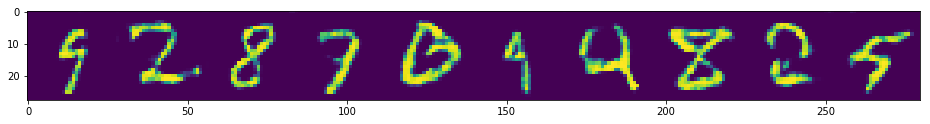

2250: dloss:  0.4157   gloss:  1.5534
2300: dloss:  0.4274   gloss:  1.5732
2350: dloss:  0.4084   gloss:  1.7824
2400: dloss:  0.3318   gloss:  1.7269
2450: dloss:  0.3630   gloss:  1.7521


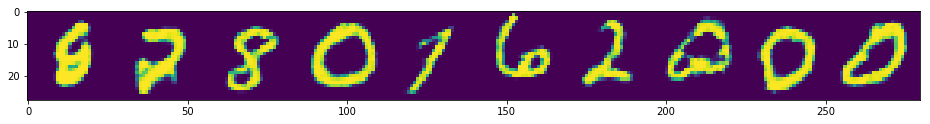

2500: dloss:  0.4142   gloss:  1.7772
2550: dloss:  0.3341   gloss:  1.8792
2600: dloss:  0.4048   gloss:  1.7570
2650: dloss:  0.3448   gloss:  1.7769
2700: dloss:  0.3490   gloss:  1.8456


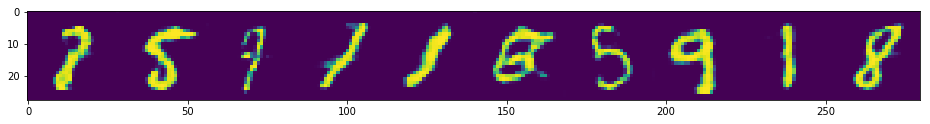

2750: dloss:  0.3305   gloss:  1.6846
2800: dloss:  0.3503   gloss:  1.7435
2850: dloss:  0.3516   gloss:  1.8181
2900: dloss:  0.2903   gloss:  1.8918
2950: dloss:  0.4255   gloss:  1.7404


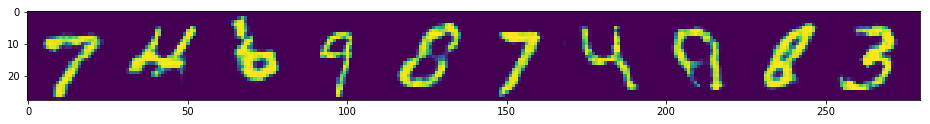

3000: dloss:  0.2876   gloss:  1.9972
3050: dloss:  0.3464   gloss:  1.8412
3100: dloss:  0.3749   gloss:  1.8386
3150: dloss:  0.3365   gloss:  1.9483
3200: dloss:  0.3361   gloss:  1.7536


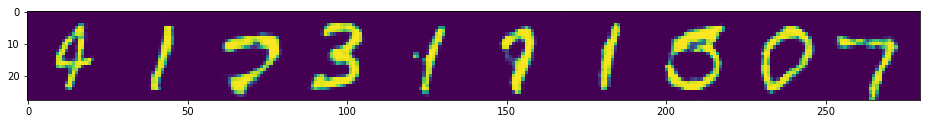

3250: dloss:  0.3341   gloss:  1.9647
3300: dloss:  0.3726   gloss:  1.8026
3350: dloss:  0.3163   gloss:  2.0877
3400: dloss:  0.3267   gloss:  1.9541
3450: dloss:  0.2709   gloss:  2.0635


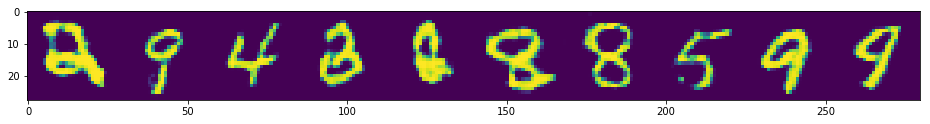

3500: dloss:  0.3608   gloss:  1.8927
3550: dloss:  0.3559   gloss:  1.9594
3600: dloss:  0.3680   gloss:  2.0010
3650: dloss:  0.2609   gloss:  2.0790
3700: dloss:  0.2705   gloss:  2.1073


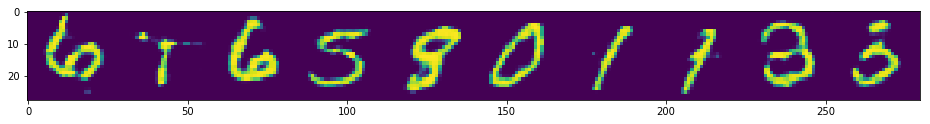

3750: dloss:  0.2745   gloss:  2.0746
3800: dloss:  0.3013   gloss:  2.0181
3850: dloss:  0.3271   gloss:  2.0101
3900: dloss:  0.3235   gloss:  1.9673
3950: dloss:  0.3013   gloss:  1.9933


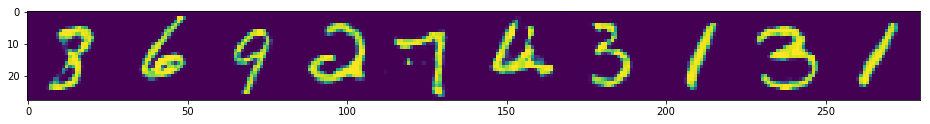

4000: dloss:  0.2496   gloss:  2.2521
4050: dloss:  0.2958   gloss:  2.0710
4100: dloss:  0.2585   gloss:  2.1286
4150: dloss:  0.2820   gloss:  2.3051
4200: dloss:  0.3339   gloss:  2.0128


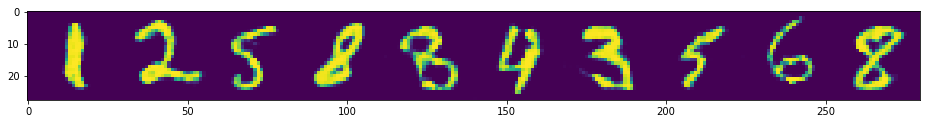

4250: dloss:  0.3211   gloss:  2.2184
4300: dloss:  0.2763   gloss:  2.1737
4350: dloss:  0.2376   gloss:  2.4453
4400: dloss:  0.2572   gloss:  2.2074
4450: dloss:  0.2376   gloss:  2.4295


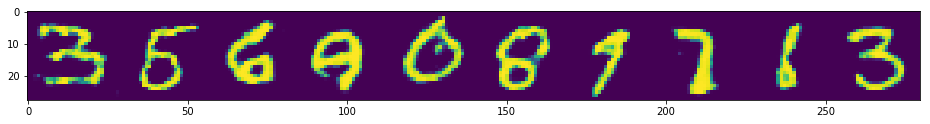

4500: dloss:  0.2335   gloss:  2.1717
4550: dloss:  0.2620   gloss:  2.1742
4600: dloss:  0.2522   gloss:  2.6295
4650: dloss:  0.2450   gloss:  2.4582
4700: dloss:  0.2258   gloss:  2.3595


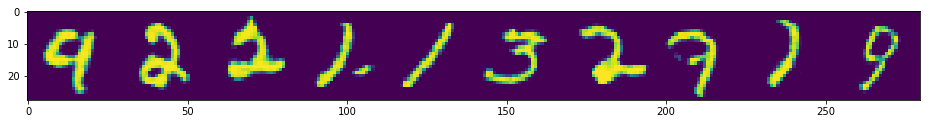

4750: dloss:  0.3018   gloss:  2.4650
4800: dloss:  0.3426   gloss:  2.1524
4850: dloss:  0.2287   gloss:  2.5152
4900: dloss:  0.2454   gloss:  2.4394
4950: dloss:  0.2374   gloss:  2.2643


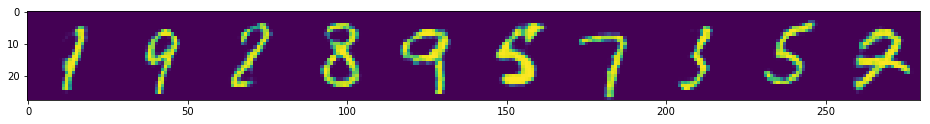

In [4]:
BS = 256

# GAN training loop
for i in range(5000):
  # train discriminator
  dm.trainable = True
  real_i = x_train[np.random.choice(x_train.shape[0], BS)]
  fake_i = gm.predict_on_batch(np.random.normal(0,1,size=(BS,ZDIM)))
  dloss_r = dm.train_on_batch(real_i, np.ones(BS))
  dloss_f = dm.train_on_batch(fake_i, np.zeros(BS))
  dloss = (dloss_r + dloss_f)/2

  # train generator
  dm.trainable = False
  gloss_0 = tm.train_on_batch(np.random.normal(0,1,size=(BS,ZDIM)), np.ones(BS))
  gloss_1 = tm.train_on_batch(np.random.normal(0,1,size=(BS,ZDIM)), np.ones(BS))
  gloss = (gloss_0 + gloss_1)/2

  if i%50 == 0:
    print("%4d: dloss:%8.4f   gloss:%8.4f" % (i, dloss, gloss))
  dlosses.append(dloss)
  glosses.append(gloss)
    
  if i%250 == -1%250:
    figsize(16,16)
    figure()
    imshow(np.concatenate(gm.predict(np.random.normal(size=(10,ZDIM))), axis=1))
    plt.show()

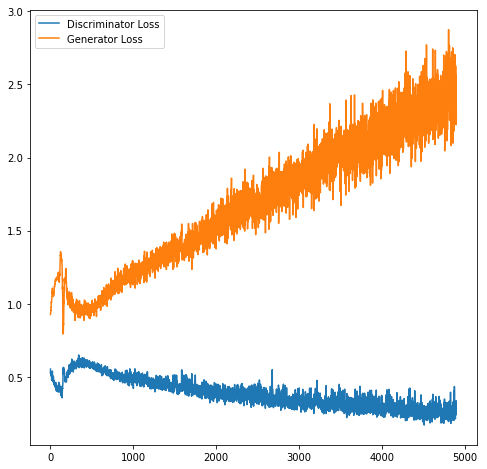

In [5]:
figsize(8,8)
figure()
plot(dlosses[100:], label="Discriminator Loss")
plot(glosses[100:], label="Generator Loss")
plt.legend()

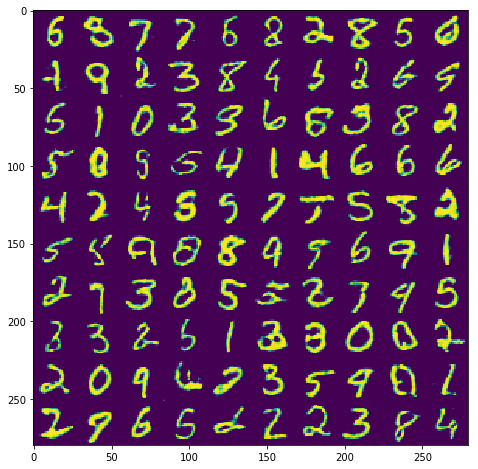

In [6]:
x = []
for i in range(10):
  x.append(np.concatenate(gm.predict(np.random.normal(size=(10,ZDIM))), axis=1))
imshow(np.concatenate(x, axis=0))